0.Intro
inner_버스승차인원

지하철과 함께 시민들의 발이 되어 주는 버스.

특히, 제주도같이 지하철을 이용할 수 없는 곳에서는 더더욱 소중하죠.

하지만, 필요할 때 타지 못한다면 결국은 무용지물!

승객들이 버스를 효율적으로 이용할 수 있게 하려면 어떻게 운영해야 할까요?

December, 2022, ver.001 | All rights reserved by Dacon

버스 운행 시간 예측 프로젝트에 참여하신 데이커 여러분, 환영합니다. 🙌
한국처럼 대중교통이 잘 발달한 나라도 세계적으로 드물다고 하죠.
특히나 도서 지방은 지리적 특성상 지하철을 설치하기 어려워 버스 의존도가 내륙에 비하여 더 높은 것이 현실입니다.

다 함께 제주도의 버스 운행 시간을 예측해서 더 쾌적한 제주도를 만들어 볼까요?

물류/운송 프로젝트 초보자도 함께하는 데이콘 프로젝트 교육, go go!

[프로젝트의 목적]

버스 운행 시간, next_arrive_time 을 예측

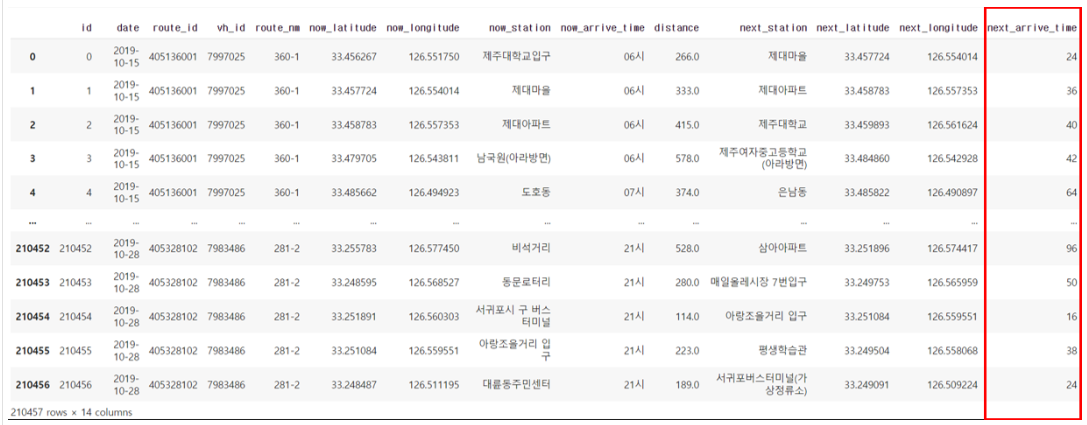

앞서 데이터 불러오기에서 test 데이터에는 train 데이터와 달리
버스 운행 시간, next_arrive_time 열이 없었던 것을 기억하시나요?

또 정답 제출용 파일인 sample_submission에는 next_arrive_time(버스 운행 시간) 데이터가 모두 0으로 채워져 있는 것을 보았습니다.

이를 통해 next_arrive_time(버스 운행 시간)을 예측하는 문제인 것을 확인했었죠!

다시 정리하면, 이번 프로젝트의 목적은 날짜, 운행 정보, 역 정보, 운행 시각 정보를 가지고 버스 운행 시간을 예측하는 것입니다.

1.데이터 불러오기
[문제 1]
지난 시간과 마찬가지로 pandas 라이브러리의 read_csv() 함수를 이용해 분석에 사용할 데이터를 불러와주세요.

In [ ]:
# 데이터를 불러오고 살펴보기 위한 pandas 라이브러리
import pandas as pd

# train 데이터 불러오기
train = pd.read_csv('train.csv')
 
# test 데이터 불러오기
test = pd.read_csv('test.csv')

# sample_submission 데이터 불러오기
submission = pd.read_csv('sample_submission.csv')

2.데이터 확인
이번 스테이지에서는 shape와 info() 메소드를 이용하여 데이터를 살펴보겠습니다.

shape: 행과 열 출력

info(): 데이터 결측치 및 변수들의 타입 확인

그럼 데이터가 어떻게 생겼는지 앞선 메소드를 이용하여 확인해 봅시다.

In [ ]:
train.shape

3.데이터프레임 정보 확인하기
train 데이터 셋은 210457행과 14열을 가지고 있는 것을 확인해 볼 수 있습니다.

그럼 info() 메소드를 이용해 데이터 컬럼, 결측치 및 변수들의 타입을 확인해 봅시다.

In [ ]:
train.info()

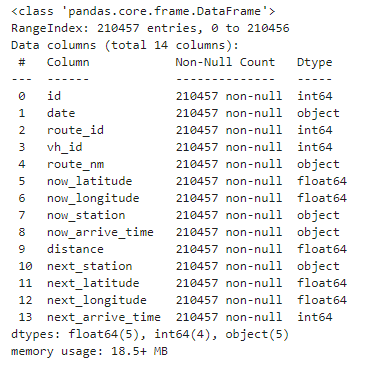

데이터를 살펴보니 총 14개의 열이 있네요. 하나하나 데이터를 살펴볼까요?

id: 해당 데이터에서의 고유한 ID
date: 버스 운행 날짜
route_id: 버스 노선 ID
vh_id: 버스 ID
route_nm: 버스 노선 실제 번호
now_latitude: 현재 정류소의 위도
now_longitude: 현재 정류소의 경도
now_station: 현재 정류소 이름
now_arrive_time: 현재 정류장에 도착한 시간
distance: 현재 정류장에서 다음 정류장까지 실제 이동한 거리
next_station: 다음 정류소 이름
next_latitude: 다음 정류소의 위도
next_longitude: 다음 정류소의 경도
next_arrive_time: 다음 정류장에 도착할 때까지 걸린 시간(단위: 초)으로, 답안 제출을 위해서 예측해야 되는 값
Non-Null Count를 살펴보면 모든 변수에서 결측치(누락된 데이터)는 존재하지 않는 것을 알 수 있습니다.
만약 결측치가 존재한다면, 보다 정확한 모델을 설계하기 위해 적절하게 처리해 주어야 합니다.

또한 train 데이터의 컬럼 정보는 5개의 카테고리로 나눠서 생각할 수 있습니다.

날짜: date
운행 정보: route_id, vh_id, route_nm
역 정보:
현재 역 정보: now_latitude, now_longitude, now_station
다음 역 정보: next_station, next_latitude, next_longitude,
운행 시각: now_arrive_time, distance
예측하고자 하는 대상(운행 시간): next_arrive_time
날짜, 운행 정보, 역 정보, 운행 시각, 운행 시간

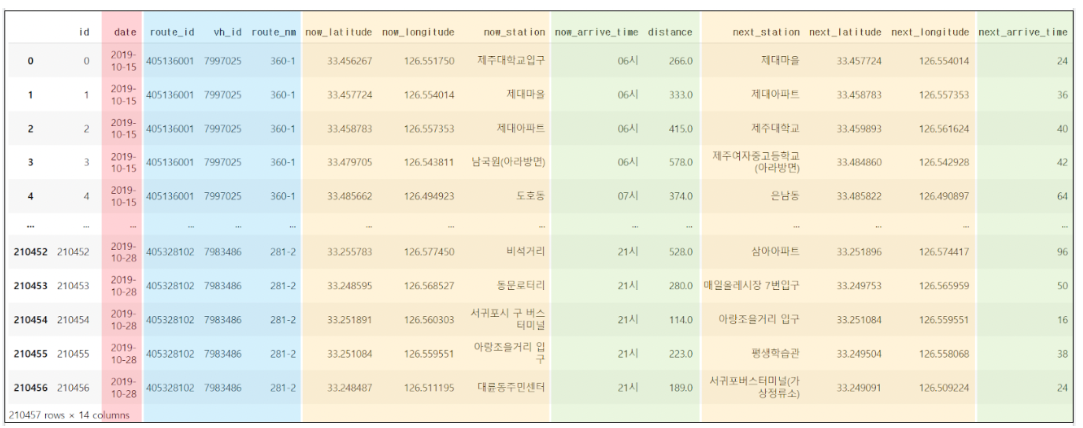

[Folium 지도 그리기]

그럼 워밍업할 겸 위도와 경도, 즉 좌표 정보를 가지고 train의 상위 5개 행을 표시하는 지도를 그려 봅시다.

앞선 스테이지에서 사용했던 folium 라이브러리로 지도를 쉽게 시각화할 수 있습니다.

위도, 경도 데이터를 확인하기 위하여 데이터 값과 인덱스를 추출해 보도록 하겠습니다.

values: 데이터의 값 추출
index: 데이터의 인덱스 추출
import folium

#좌표 정보
locations = train[['next_latitude',	'next_longitude']][:5].values.tolist()

#지도의 중심 좌표 설정
center = [33.35, 126.5]

#지도 (Map) 그리기
m = folium.Map(location=center, zoom_start=11, tiles='cartodbpositron',)

#점(Circle) 찍기
for i, location in enumerate(locations):
    folium.Circle(
        radius=50,
        location=location,
        tooltip=train['next_station'].loc[i],
        fill=True
    ).add_to(m)

#경로(PolyLIne) 추가
folium.PolyLine(locations=locations).add_to(m)

m

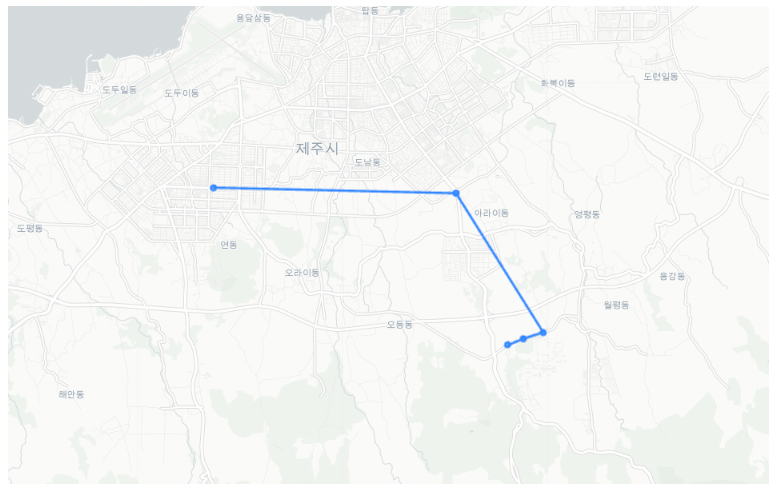

folium 라이브러리를 사용하여 train 데이터셋의 위도와 경도 좌표 정보만으로 멋진 지도를 그렸습니다!


[EDA]

바로 EDA 단계를 진행해 볼까요?

EDA 과정

데이터 수집
시각화 탐색
패턴 도출
인사이트 발굴
EDA 방법

Target을 주인공으로
2) Feature를 주인공으로
3) Target과 Feature의 관계

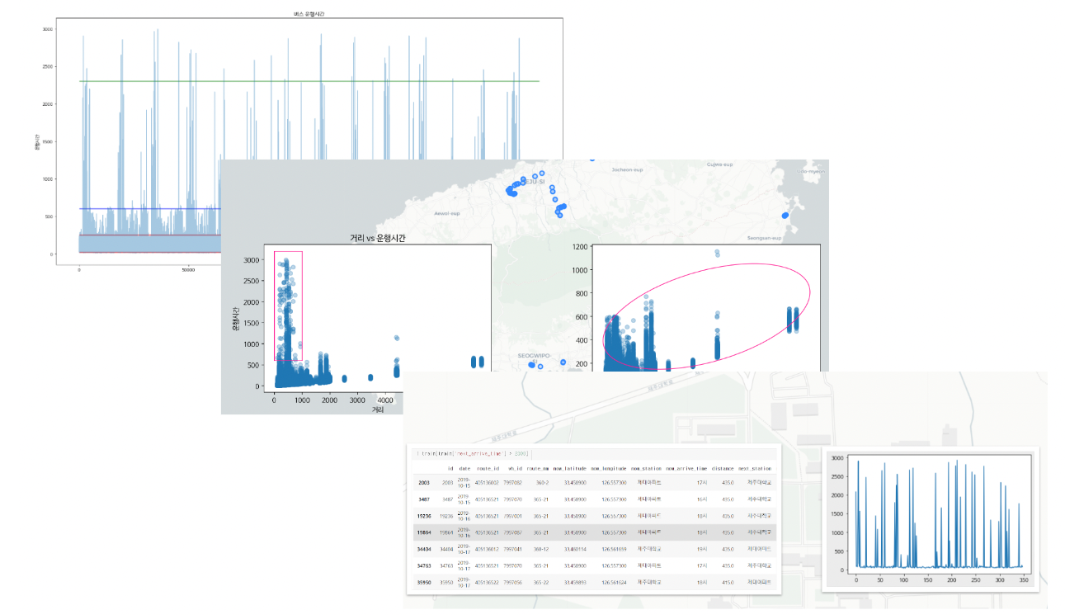

* Target을 주인공으로 한 EDA
* Feature를 주인공으로 한 EDA, Target과 Feature의 관계 <=

[운행 정보(route_id / vh_id / route_nm)]

어떤 컬럼에 대해서 하나의 고유한 값만 존재한다면, 그 컬럼은 식별 가능한 컬럼이라고 할 수 있습니다.

운행 정보(route_id, vh_id, route_nm) 컬럼 중 식별 가능한 컬럼이 존재한다면, 나머지는 분석에 사용하지 않아도 됩니다.

그럼 이러한 칼럼이 있는지 임의로 칼럼을 뽑아 살펴볼까요?

4.route_id -> route_nm , route_nm -> route_id

In [ ]:
print(train[train['route_id'] == 405136001]['route_nm'].unique())
print(train[train['route_nm'] == '360-1']['route_id'].unique())

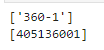

하나의 route_id 값은 하나의 route_nm 값만을 나타냅니다.

즉, 1:1 일대일 대응입니다. 따라서 둘 중 하나의 컬럼은 사용하지 않아도 무방합니다.

5.route_id, route_nm -> vh_id

In [ ]:
print(train[train['route_id'] == 405136001]['vh_id'].unique())
print(train[train['route_nm'] == '360-1']['vh_id'].unique())

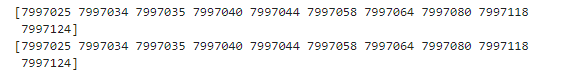

1:1 대응 관계였던 route_id, route_nm과 달리 vh_id는 1:n, 일대다 관계입니다.
그렇다면 반대로도 실험해 볼까요?

6.vh_id -> route_id, route_nm

In [ ]:
print(train[train['vh_id'] == 7997025]['route_id'].unique())
print(train[train['vh_id'] == 7997025]['route_nm'].unique())

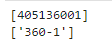

7.고윳값 추출
vh_id를 기준으로 하면 route_id와 route_nm의 고윳값을 구할 수 있네요.

이는 vh_id가 route_id와 route_nm보다 더 많은 정보를 포함하고 있음과 동시에 식별 가능한 컬럼임을 의미합니다.

In [ ]:
def check(text:str):
    if (len(train[train['vh_id'] == text]['route_id'].unique()) != 1) | (len(train[train['vh_id'] == text]['route_nm'].unique()) != 1):
        return True
    else :
        return False

temp = list(map(check, train['vh_id'].unique()))
set(temp)

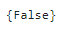

즉, vh_id를 알면 route_id, route_nm을 알 수 있습니다.

8.Feature2 : GPS
vh_id(버스 ID)별 버스 운행 경로를 folium 지도에 시각화하려면 어떻게 해야 할까요?
vh_id별 데이터셋에서 좌표 정보를 활용해야겠죠?

그렇다면 데이터 개수(행 개수)가 많은 데이터에서 vh_id별 데이터셋을 쉽게 추출할 수 있는 방법을 알아봅시다.

우선 vh_id가 바뀌는 인덱스를 살펴보겠습니다!

In [ ]:
train[175:185]

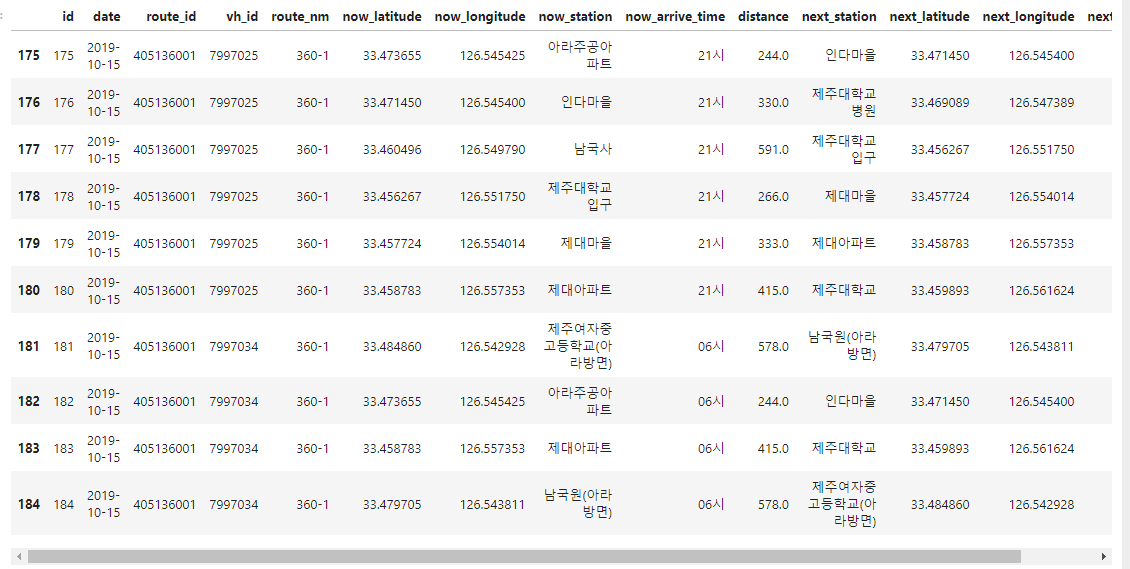

인덱스 181에서 vh_id가 처음 바뀌는군요!
하지만 vh_id가 바뀌는 인덱스 정보를 얻기 위해 항상 train 데이터를 살펴볼 수는 없겠죠?

shift() 함수를 사용해 인덱스 정보를 추출하겠습니다.

Pandas의 DataFrame이나 Series에 shift() 함수를 적용해서 행의 위치를 일정 칸씩 이동시킬 수 있습니다.

shift(정수)와 같이 사용하며, 입력한 정수만큼 행의 위치를 이동시킵니다.
이때 양수면 아래로, 음수면 위로 이동됩니다.

9.temp 컬럼 추가
[문제 2]
그럼 vh_id가 바뀌는 인덱스를 찾기 위해 temp 컬럼을 추가해 봅시다.
직접 한번 해 볼까요?

In [ ]:
train['temp'] = train['vh_id'].shift(-1)

10.vh_id 가 바뀌는 인덱스
[문제 3]

idx 리스트 생성
: vh_id 와 temp 값이 다른 행의 인덱스 번호 추가

* 가장 첫 vh_id 도 포함하기 위해, idx 리스트에 -1을 추가해 주세요!

In [ ]:
idx = [-1]     
idx = idx + list(train[train['vh_id'] != train['temp']]['id'].values)


이처럼 데이터프레임에서 loc 과 슬라이싱 적용으로 데이터를 추출하는 방법을 활용하여

vh_id별 데이터셋을 추출할 수 있습니다!

[vh_id별 데이터셋 & 경로 시각화]

그럼 vh_id별 경로를 시각화하는 코드를 살펴볼까요?

    import folium

    my_idx = 700

    center = [((train[['now_latitude', 'now_longitude']].loc[1].values[0])+(train[['now_latitude', 'now_longitude']].loc[len(train)-1].values[0]))/2, 
          ((train[['now_latitude', 'now_longitude']].loc[1].values[1])+(train[['now_latitude', 'now_longitude']].loc[len(train)-1].values[1]))/2]

    m = folium.Map(location=center, zoom_start=11)

    locations = train.loc[idx[my_idx]+1:idx[my_idx+1]][['next_latitude', 'next_longitude']].values

    folium.PolyLine(locations=locations).add_to(m)

    m

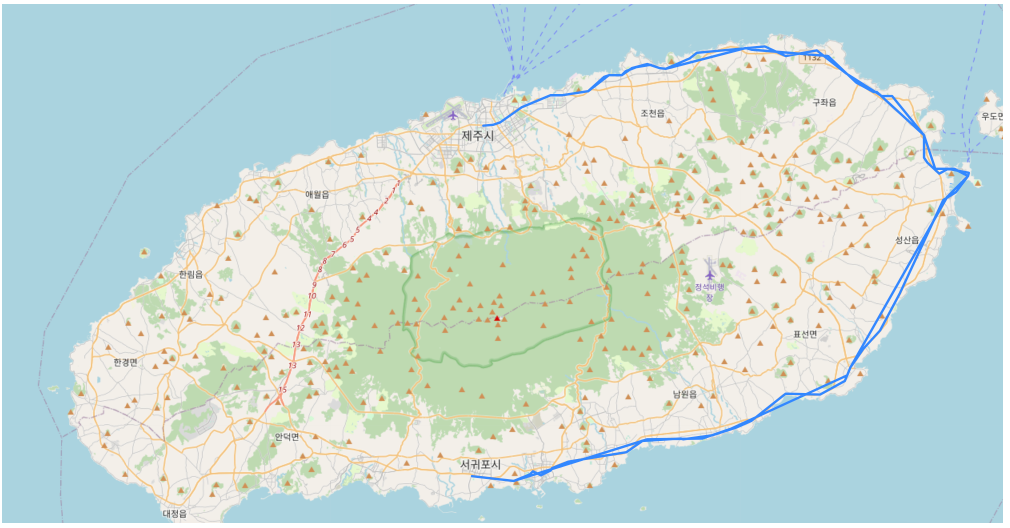

vh_id가 바뀌는 인덱스 정보로 vh_id별 데이터셋과 vh_id별 경로를 시각화할 수 있게 되었습니다!

11.역 이름과 좌표
역 이름이 같으면 좌표도 같을까요?

now_station, now_latitude를 groupby로 그룹화하여 count()로 개수를 세면, 역마다 고유한 좌표가 몇 개 존재하는지 알 수 있습니다!

In [ ]:
pd.DataFrame(train.groupby(['now_station', 'now_latitude']).count().reset_index()[:50].value_counts('now_station'))

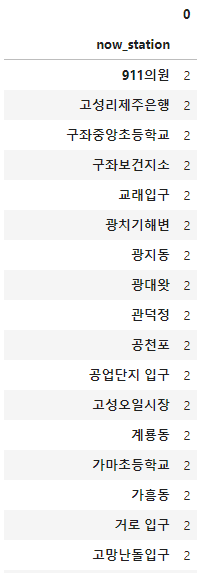
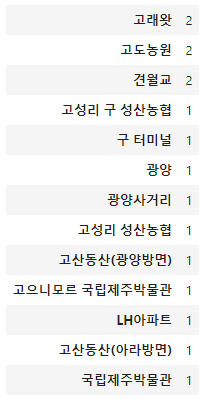

역 이름은 같지만 좌표가 다른 데이터가 존재하네요!

12.고윳값 추출

In [ ]:
train[train['now_station'] == '911의원']['now_latitude'].unique()

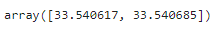

13.좌표로 역 이름을 알 수 있을까?
route_id / vh_id / route_nm 중 식별 가능한 컬럼을 찾는 check() 함수를 변형하여
이번에는 좌표의 역 이름 식별 가능 여부에 대해 확인해 보겠습니다.

우선 now_latitude의 식별 가능 여부를 확인해 볼까요?

In [ ]:
def check_station(text:str):
    if len(train[train['now_latitude'] == text]['now_station'].unique()) != 1:
        return True
    else :
        return False

temp = list(map(check_station, train['now_latitude'].unique()))
set(temp)

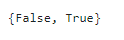

14.식별 가능 여부 확인
이제 now_longitude의 식별 가능 여부를 확인해 봅시다.

In [ ]:
def check_station(text:str):
    if len(train[train['now_longitude'] == text]['now_station'].unique()) != 1:
        return True
    else :
        return False

temp = list(map(check_station, train['now_longitude'].unique()))
set(temp)

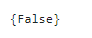

15.식별 가능 여부 확인
그럼 next_longitude의 식별 가능 여부를 확인해 봅시다.

In [ ]:
def check_station(text:str):
    if len(train[train['next_longitude'] == text]['next_station'].unique()) != 1:
        return True
    else :
        return False

temp = list(map(check_station, train['next_longitude'].unique()))
set(temp)

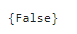

결론적으로 now_latitude는 하나의 False를 반환하지 않고, now_longitude, next_longitude만 하나의 False를 반환하므로

longitude를 알면 역 이름을 알 수 있다는 사실을 알았습니다!

16.역 이름은 같지만 좌표가 다른 경우, 좌표별로 운행 시간에 차이가 날까?
앞에서 역 이름이 같아도 좌표가 다른 데이터가 있다는 것이 확인됐습니다.

그렇다면 같은 역에 대한 좌표별 운행 시간은 차이가 나는지 911의원, 고성리제주은행 역을 살펴봅시다!

911의원

In [ ]:
# 파이썬 warning 무시
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# 시각화를 위한 라이브러리
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트를 사용하기 위한 코드
fe = fm.FontEntry(fname = 'NotoSansKR-Regular.otf', name = 'NotoSansKR')
fm.fontManager.ttflist.insert(0, fe)
plt.rc('font', family='NotoSansKR')

## 코드 작성
x = ['911의원1', '911의원2']
y = [train[train['now_latitude'] == train[train['now_station'] == '911의원']['now_latitude'].unique()[0]]['next_arrive_time'].mean(),
     train[train['now_latitude'] == train[train['now_station'] == '911의원']['now_latitude'].unique()[1]]['next_arrive_time'].mean()]

plt.figure(dpi=150)

plt.title('정류장 별 운행시간')
plt.xlabel('정류장')
plt.ylabel('운행시간')

plt.bar(x,y)
plt.show()

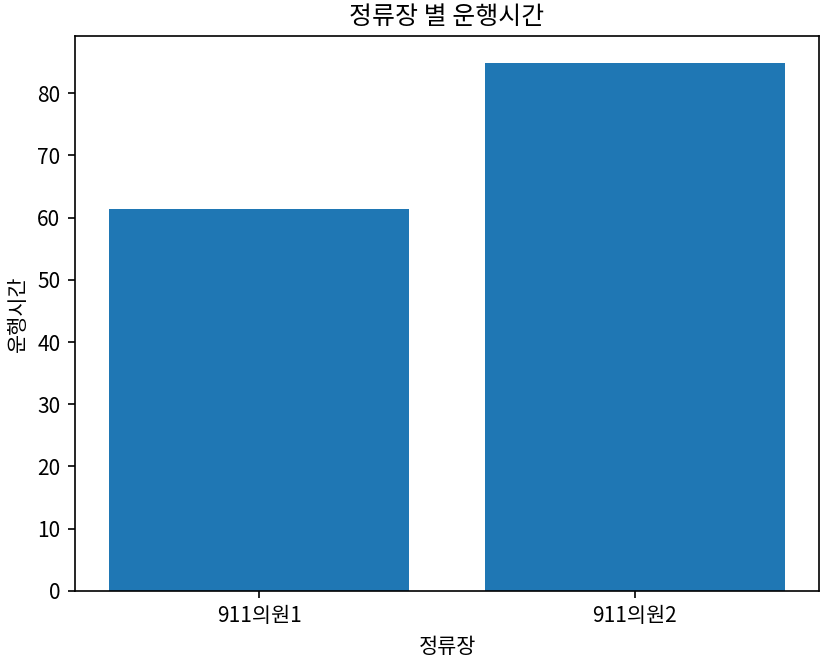

17.고성리제주은행 시각화

In [ ]:
x = ['고성리제주은행1', '고성리제주은행2']
y = [train[train['now_latitude'] == train[train['now_station'] == '고성리제주은행']['now_latitude'].unique()[0]]['next_arrive_time'].mean(),
     train[train['now_latitude'] == train[train['now_station'] == '고성리제주은행']['now_latitude'].unique()[1]]['next_arrive_time'].mean()]

plt.figure(dpi=150)

plt.title('정류장 별 운행시간')
plt.xlabel('정류장')
plt.ylabel('운행시간')

plt.bar(x,y)
plt.show()

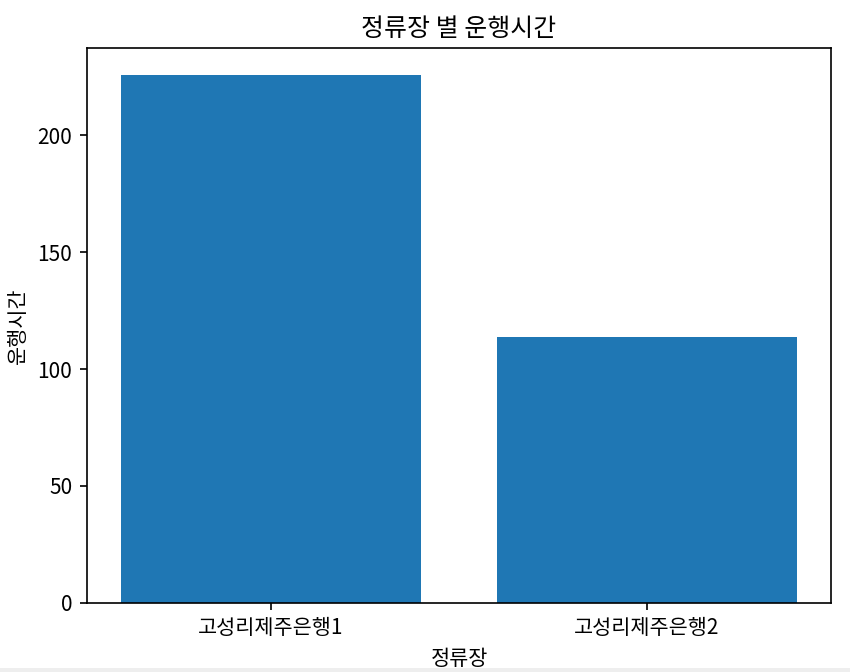

911의원, 고성리제주은행 모두 좌표별 운행 시간에 차이가 나네요.

같은 역 이름을 가졌더라도 좌표가 다르면 운행 시간에 차이가 있다는 것을 알 수 있습니다.

18.시간대별 데이터 수
현재 정류장에 도착한 시간, now_arrive_time 컬럼을 한번 살펴보도록 하겠습니다.

now_arrive_time은 "hh시" 형태로 이루어져 있습니다.
이 데이터를 시간순으로 정렬하고 개수를 구해 봅시다!

In [ ]:
train['now_arrive_time'].value_counts().sort_index()

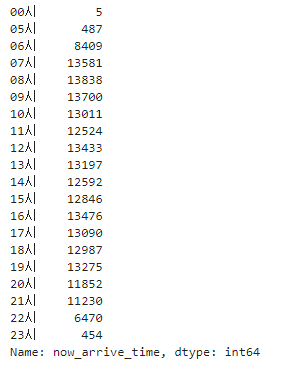

19.train 데이터의 시간대별 데이터 수 시각화
위에서 구한 now_arrive_time 데이터 수 정보를 bar(막대 그래프)로 시각화해 볼까요?

In [ ]:
x = train['now_arrive_time'].value_counts().sort_index().index
y = train['now_arrive_time'].value_counts().sort_index().values

plt.figure(dpi=150)
plt.xticks(rotation=90)

plt.bar(x,y)
plt.show()

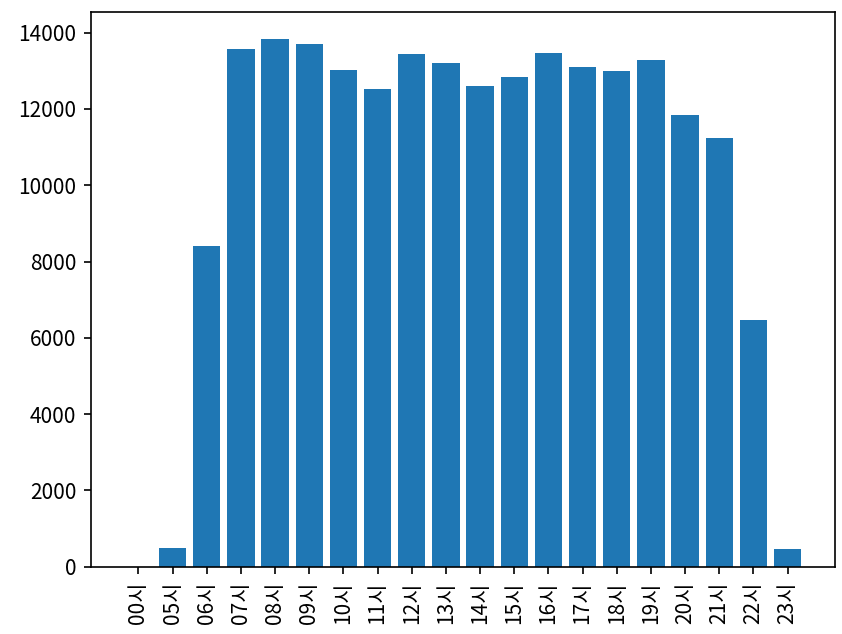

20.test 데이터의 시간대별 데이터 수 시각화
이번에는 test 데이터의 now_arrive_time 데이터 수를 바로 시각화해 보도록 하죠!

In [ ]:
x = test['now_arrive_time'].value_counts().sort_index().index
y = test['now_arrive_time'].value_counts().sort_index().values

plt.figure(dpi=150)
plt.xticks(rotation=90)

plt.bar(x,y)
plt.show()

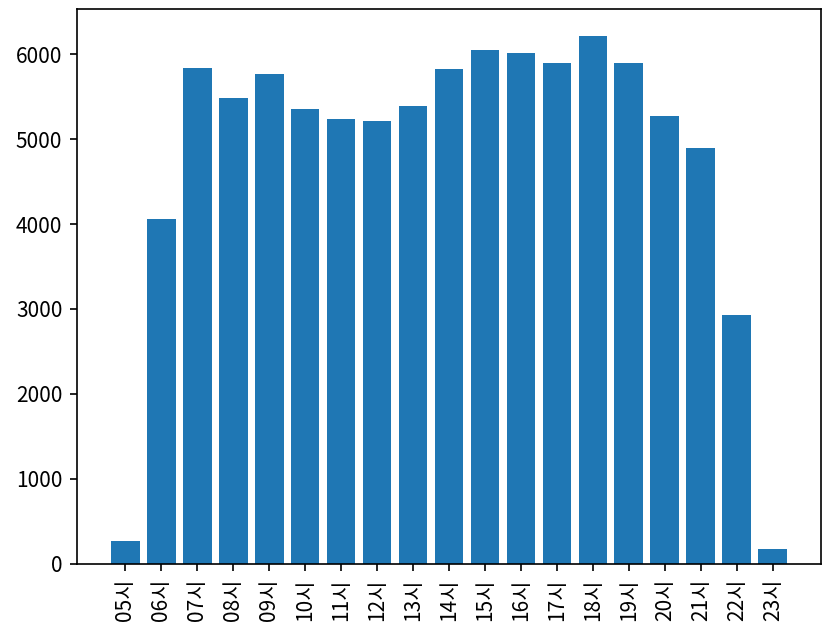

train과 test의 시간대별 데이터 수는 비슷한 분포를 가집니다.

00시 시간대는 test 데이터에는 존재하지 않고, train 데이터에만 존재하는 것을 확인할 수 있습니다.

21.hist(히스토그램)로 거리 데이터 시각화
지난 EDA - target에서는 target이 중심이었기에, 운행 시간(next_arrive_time)이 긴 데이터에 대한 거리(distance) 분포를 확인했었는데요.

이번에는 반대로 거리(distance)를 중심으로 살펴보겠습니다.

먼저, 전체 train의 거리 분포를 hist(히스토그램)로 시각화해 보죠!

In [ ]:
plt.figure(dpi=150)

plt.hist(train['distance'])
plt.show()

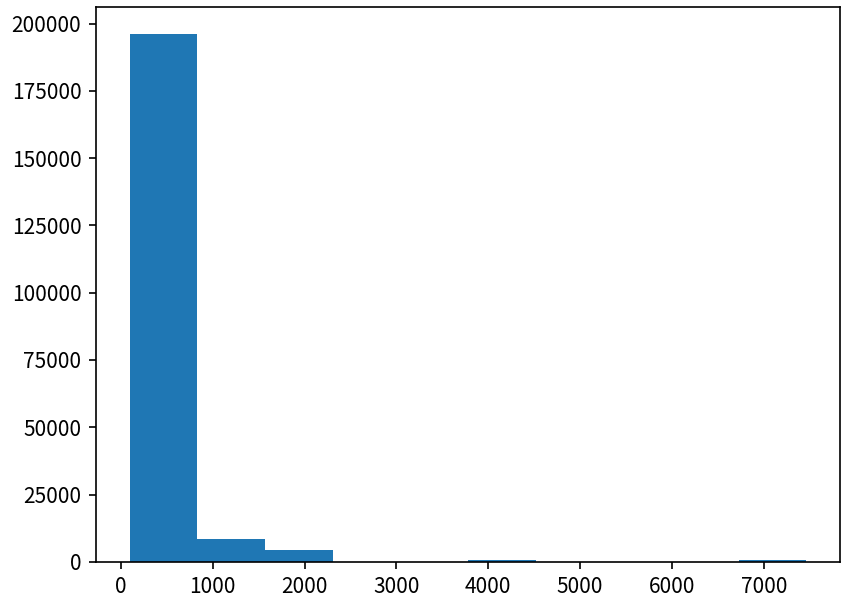

22.Plot(선 그래프)로 거리 데이터 시각화

In [ ]:
train['distance'].plot(figsize=(20,10))
plt.ylabel('distance')
plt.show()

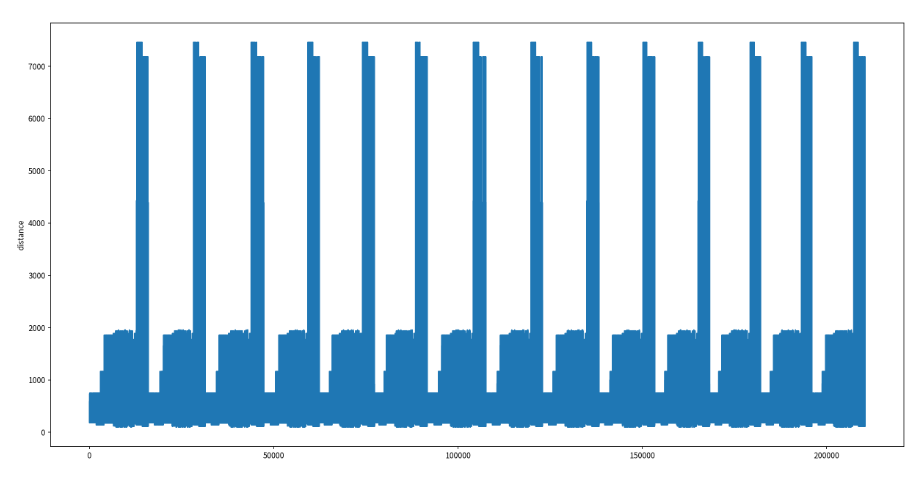

거리가 매우 긴 경로가 존재하는 것 같습니다.

조금 더 자세히 살펴보도록 하죠!

23.거리가 매우 긴 역
6000 초과를 기준으로 두고, 거리가 매우 긴 경로를 now_station과 next_station 컬럼에서 모두 확인해 보겠습니다.

In [ ]:
print(train[train['distance'] > 6000]['now_station'].unique())
print(train[train['distance'] > 6000]['next_station'].unique())

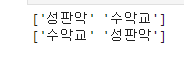

now_station과 next_station 모두 수악교와 성판악의 거리가 긴 것을 확인했습니다.

그럼 두 역의 경로를 folium 으로 지도에 나타내 볼까요?
이번에도 아래의 코드를 참고해 주세요!

    center = [((train[['now_latitude', 'now_longitude']].loc[1].values[0])+(train[['now_latitude', 'now_longitude']].loc[len(train)-1].values[0]))/2, 
              ((train[['now_latitude', 'now_longitude']].loc[1].values[1])+(train[['now_latitude', 'now_longitude']].loc[len(train)-1].values[1]))/2]

    m = folium.Map(location=center, zoom_start=11)

    locations = [train[train['distance'] > 6000][['now_latitude', 'now_longitude']].iloc[0].values, train[train['distance'] > 6000][['next_latitude', 'next_longitude']].iloc[0].values]

    folium.PolyLine(locations=locations).add_to(m)

    m

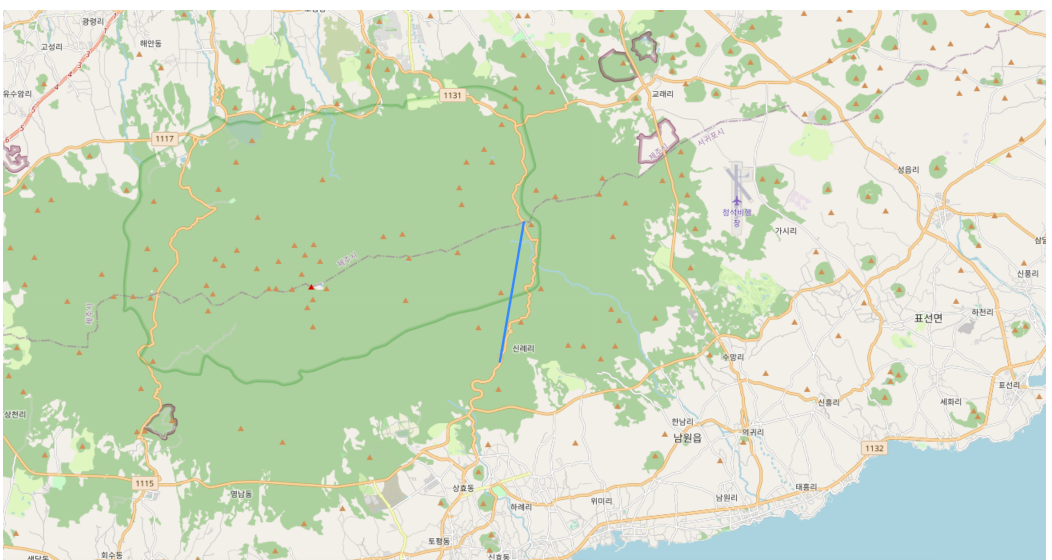

24.거리가 매우 긴 노선의 버스 ID 정보
거리가 매우 긴 vh_id(버스 ID) 정보도 모두 확인해 봅시다.

In [ ]:
train[train['distance'] > 6000]['vh_id'].unique()

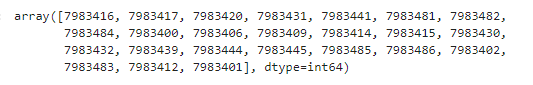

거리가 긴 vh_id는 여러 개가 존재하네요.

이 중 하나의 vh_id에 대한 경로를 그려 봅시다.

'2019-10-16' 하루에 해당하는 운행 경로를 시각화해 보겠습니다.
    center = [((train[['now_latitude', 'now_longitude']].loc[1].values[0])+(train[['now_latitude', 'now_longitude']].loc[len(train)-1].values[0]))/2, 
              ((train[['now_latitude', 'now_longitude']].loc[1].values[1])+(train[['now_latitude', 'now_longitude']].loc[len(train)-1].values[1]))/2]

    m = folium.Map(location=center, zoom_start=11)

    locations = train[(train['vh_id'] == train[train['distance'] > 6000]['vh_id'].unique()[4]) & (train['date'] == '2019-10-16')][['now_latitude',	'now_longitude']].values

    folium.PolyLine(locations=locations).add_to(m)

    m

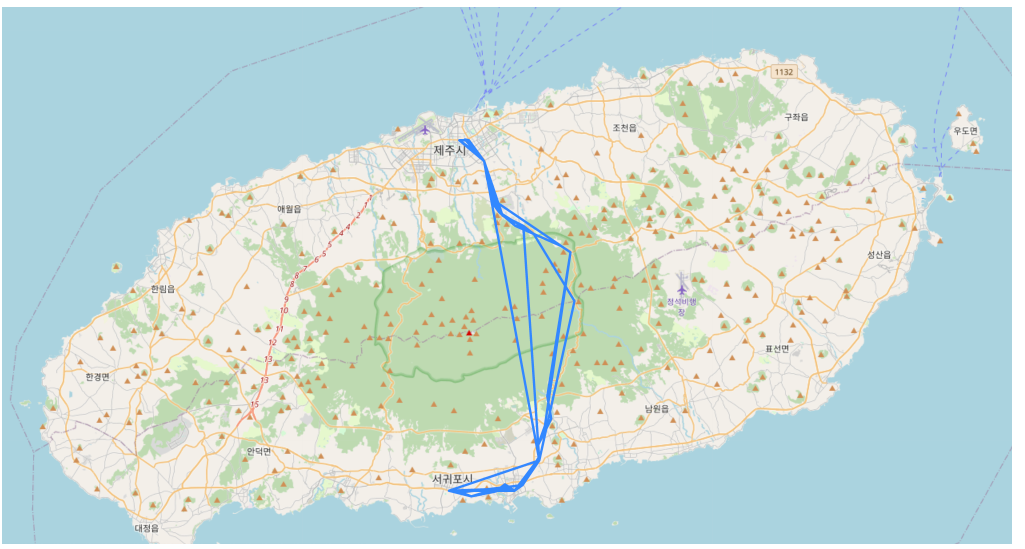

[Feature와 Target 간의 관계]

EDA의 마지막 부분, feature & target 관계를 알아보기 위해 MinMaxScaler로 스케일링을 진행해 볼까요?
여기서 스케일링이란, 변수의 값 범위를 일정한 수준으로 맞춰 주는 것을 말합니다.

MinMaxScaler에 관해서는 아래에서 다시 설명하겠습니다!

25.now_arrive_time 변수 int형 변환
[문제 4]
스케일링하기 위하여 now_arrive_time(현재 정류장에 도착한 시간) 변수를 int형(정수형)으로 바꿔 보도록 하죠! 직접 해 볼까요?

In [ ]:
def change_time(text:str):   
    return int(text[:-1]) # int(text[:2])도 동일한 결과

train['now_arrive_time'] = train['now_arrive_time'].map(change_time)


위 그래프 결과를 보면, feature와 target에는 큰 상관관계가 없는 것 같습니다.

26.데이터 처리
이제 데이터 살펴보기 단계와 탐색적 자료 분석 단계에서 확인한 데이터의 특징을 바탕으로 데이터 전처리 작업을 진행해 보도록 합시다!

다시 한번 데이터를 불러오도록 하죠!

In [ ]:
# 데이터를 불러오고 살펴보기 위한 pandas 라이브러리
import pandas as pd

# train 데이터 불러오기
train = pd.read_csv('train.csv')

# test 데이터 불러오기
test = pd.read_csv('test.csv')

7.운행 정보 전처리: vh_id, now_longitude, next_longitude
[문제 5]
이번 스테이지에서 다뤘던 vh_id, now_longitude, next_longitude에 대하여 my_dict를 생성해 봅시다.

In [ ]:
my_list = list(train['vh_id'].unique()) + list(train['now_longitude'].unique()) + list(train['next_longitude'].unique())   
my_dict = {text : i for i, text in enumerate(my_list)}


28.데이터 전처리
[문제 6]
그럼 지난 스테이지와 똑같이 transform_df 함수를 사용해 봅시다!

In [ ]:
def text_to_time(text:str):   
    return int(text[:2]) 

def transform_df(df:pd.DataFrame):
    df[['vh_id', 'now_longitude', 'next_longitude']] = df[['vh_id', 'now_longitude', 'next_longitude']].applymap(lambda x:my_dict[x])   
    df['now_arrive_time'] = df['now_arrive_time'].map(text_to_time)    
    return df

train = transform_df(train)   
test = transform_df(test)
train

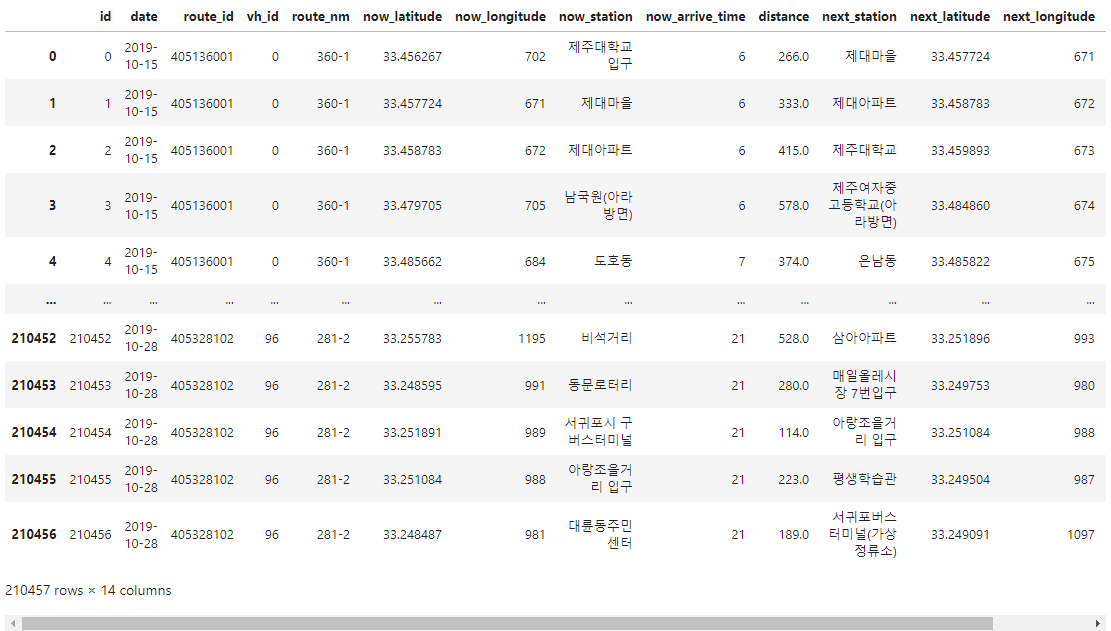

29.이상치 제거
[문제 7]
앞서 EDA를 통해 1000 초과인 데이터는 이상치라고 판단하여,
운행 시간이 1000 이하인 데이터만 사용해 보도록 하겠습니다.

직접 해 볼까요?

In [ ]:

train = train[train['next_arrive_time'] <= 1000]

30.Feature Selection
모델링을 하기 앞서, 독립변수 X와 종속변수(타깃변수) y를 설정해 볼까요?
이번 프로젝트의 목표는 버스 운행 시간의 예측값을 맞히는 것이기 때문에, 예측할 변수 Target은 next_arrive_time 입니다.

그럼 모델링을 하기 위하여 train 데이터에서 학습에 사용할 변수 X와 예측할 변수 y를 분리해 보겠습니다.

In [ ]:
# 예측할 변수 y 할당
y = train['next_arrive_time']

# y 데이터를 다시 살펴봅니다.
y.head()

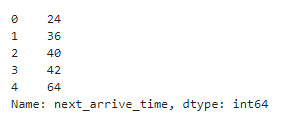

31.독립변수 설정
[문제 8]
이제 종속변수를 제외한 독립변수를 설정해 보죠!

이번엔 직접 해 볼까요?

In [ ]:
# 'vh_id', 'now_longitude', 'now_arrive_time', 'distance', 'next_longitude' 만 사용


# 학습에 사용할 변수 X 할당

features = ['vh_id', 'now_longitude', 'now_arrive_time', 'distance', 'next_longitude']

X = train[features]

# X 데이터를 다시 살펴봅니다.
X.head()

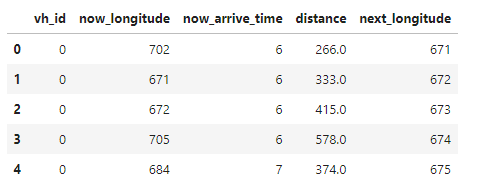

우리가 모델을 학습시킬 때는

vh_id, now_longitude, now_arrive_time, distance, next_longitude

총 5개의 독립변수를 이용할 것입니다.

32.데이터 분리
[문제 9]
X_train, X_valid, y_train, y_valid를 생성해 보세요.

train셋과 validation셋의 비율은 9대 1이어야 합니다.

그럼 실습해 볼까요?

In [ ]:

from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size=0.1, shuffle=False)

test_size = 0.1로 설정하였기 때문에 X_train과 X_valid의 비율이 9:1로 구성된 것을 알 수 있습니다.

지난 스테이지에 이어 아래의 그림으로 모델 검증에 대해 완벽히 이해해 봅시다!

그림으로 모델 검증 알아보기!

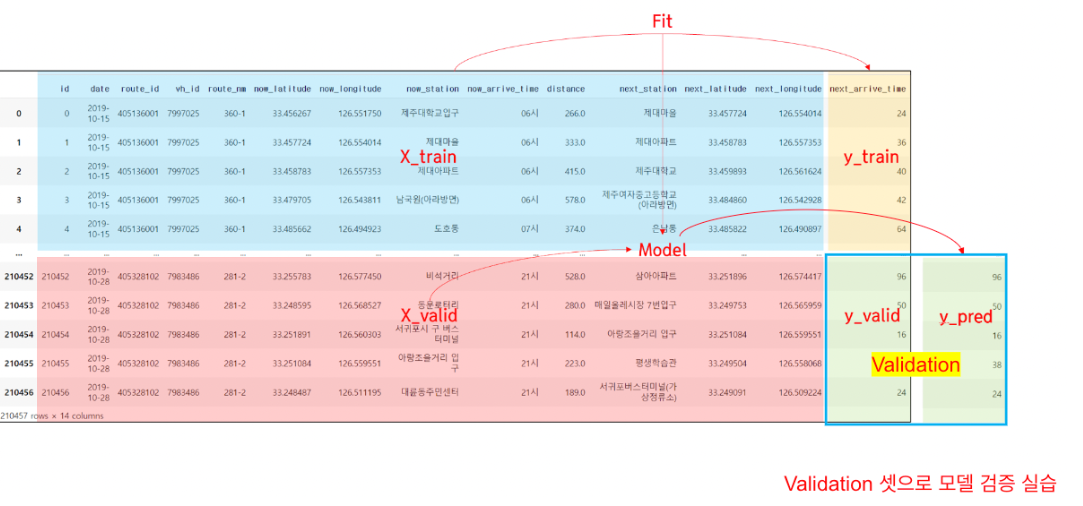

실제 train 데이터를 9:1로 분할하여 X_train, y_train, X_valid, y_valid 데이터셋을 준비한다.
X_train, y_train으로 모델을 학습한다.
X_train, y_train으로 학습된 모델로 X_valid에 대한 예측값 y_pred를 얻는다.
X_valid에 대한 실제값 y_valid와 예측값 y_pred을 비교하여 모델 성능을 검증한다.
이해가 되셨나요?

분리한 데이터로 모델을 검증하는 것은 이후 스테이지에서 진행하기로 하고,
그럼 본격적인 모델링 과정으로 들어가 보죠!

[모델 선택]

이제 모델을 만들 차례입니다.
이번 스테이지에서 사용할 모델은 랜덤포레스트(Random Forest) 모델입니다!

[랜덤 포레스트(Random Forest)란?]

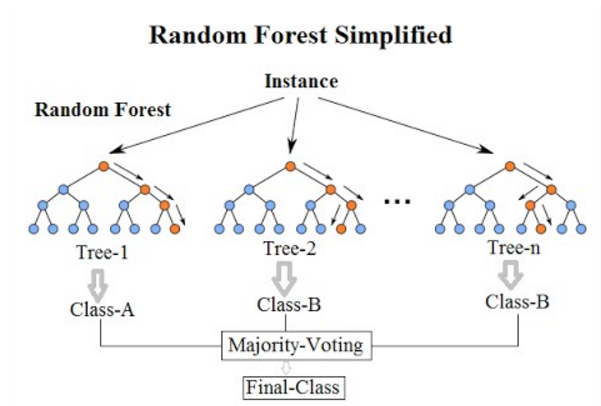

By Venkata Jagannath - https://community.tibco.com/wiki/random-forest-template-tibco-spotfirer-wiki-page
랜덤 포레스트는 의사결정나무의 단점을 보완하여 더욱 고도화된 앙상블 모델인데요.
한마디로, 훈련 과정에서 만들어진 다수의 의사 결정 나무로부터 분류된 결과를 집계해 최종적으로 분류된 데이터, 또는 평균 예측치를 출력하는 모델입니다.

먼저 의사 결정 나무란, 의사 결정 규칙을 나무 구조로 나타내어 전체 자료를 몇 개의 소집단으로 분류하거나 예측을 수행하는 분석 방법입니다.

이러한 수많은 의사 결정 나무들을 모아 숲을 구성하기에 '포레스트'라고 하는 것인데요.
다만, 각각의 의사 결정 나무들을 만들 때 쓰이는 특징들을 무작위로 선정하기 때문에 '랜덤'이 붙는 것입니다.

모델의 이름 그대로, 랜덤 포레스트는 임의(random)의 숲을 구성하기 때문에 오버 피팅, 즉 과적합을 피할 수 있습니다.
다수의 나무들로부터 분류를 집계하는 만큼, 오버 피팅이 나타나는 나무의 영향력을 줄일 수 있거든요.

또한, 앞서 랜덤 포레스트가 앙상블 모델이라고 언급했었죠?
앙상블(ensemble)은 분류, 회귀 분석 등에서 자주 사용되는 학습 방법의 일종으로, 좋은 성능을 얻기 위해 다수의 학습 알고리즘을 사용하는 것을 말합니다.

랜덤 포레스트에서는 이 앙상블 기법 중에서도 배깅을 이용합니다!

[배깅(Bagging)]

배깅(Bagging)은 'Bootstrap + Aggregating'의 합성어인데요.

여기서 부트스트랩(Bootstrap)이란, 표본 분포를 구하기 위해 데이터를 여러 번 복원 추출(랜덤 샘플링)하는 방법입니다.
이 때, 중복을 허용하기 때문에 단일 데이터가 여러 번 선택될 수도 있습니다.

배깅은 이러한 부트스트랩을 통해서 다양한 데이터셋을 만들고, 이를 학습시킨 모델을 모으는(Arregating) 방법입니다.

즉, 랜덤 포레스트에서 배깅은 모든 의사 결정 나무가 학습 데이터 세트에서 임의로 하위 데이터 세트를 추출하는 과정을 말하는 것이라 이해해 주시면 됩니다.

예를 들어 학습 데이터 세트에 총 1000개의 행이 있다고 하면, 임의로 행을 100개씩 선택해서 의사 결정 나무를 만드는 것입니다.

[배깅 속성 (Bagging Feature)]

의사 결정 나무를 만들 때는 사용될 속성(feature)들을 제한하여 각 나무들에 다양성을 줘야 합니다.
따라서 모든 속성(feature)들에서 임의로 일부를 선택하고, 그중 정보 획득량이 가장 높은 것을 기준으로 데이터를 분할합니다.
만약 데이터 세트에 n개의 속성이 있는 경우, n 제곱근 개수만큼 무작위로 선택하는 것이 일반적입니다. (A rule of thumb)
예를 들어 총 25개의 속성이 있으면 그중에서 n 제곱근인 5개의 속성만 뽑아서 살펴본 후, 정보 획득량이 가장 높은 걸 기준으로 데이터를 분할하는 것입니다.

랜덤 포레스트 모델 역시 sklearn 패키지를 이용해 간단하게 사용할 수 있습니다.

33.실제 데이터 셋을 이용한 모델로 제출

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# 모델 선언(선택)
model = RandomForestRegressor()

34.모델 학습 / 예측
이제 모델을 학습 및 예측시켜 볼까요?

선언된 모델은 fit() 메소드를 이용해 학습시킬 수 있어요.

In [ ]:
# 모델 학습
model.fit(X, y)

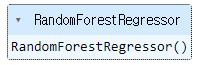

35.모델 예측
학습된 모델에 predict() 메소드를 이용해 결괏값을 예측할 수 있어요.

In [ ]:
# 학습된 모델을 이용해 결괏값 예측 후 상위 10개의 값 확인
predict = model.predict(test[features])
print('----------------------예측된 데이터의 상위 10개의 값 확인--------------------\n')
print(predict[:10])

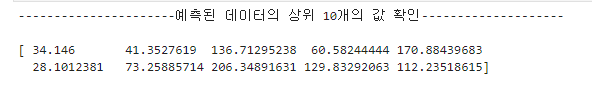

36.제출 파일 생성 및 제출
sample_submission.csv 제출용 파일을 이용하여
우리가 모델링으로 예측한 next_arrive_time 값을 채워 보죠!

In [ ]:
submission['next_arrive_time'] = predict
submission.head()

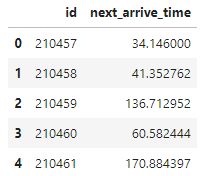

37.csv 파일 생성
submission이 잘 채워졌습니다.

그럼 지난 시간과 마찬가지로 제출용 파일 submission.csv을 생성해 보죠!

In [ ]:
submission.to_csv('submission.csv', index=False)